In [ ]:
!sudo apt install xvfb -y
!pip install pyvirtualdisplay

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 2
!sudo update-alternatives --config python3

In [ ]:
# !python3 --version
!sudo apt install python3-pip

In [ ]:
!git clone https://github.com/oluwaphemir/hmr2.0.git
!mkdir -p hmr2.0/logs/paired
!mkdir hmr2.0/logs/unpaired
!wget https://github.com/russoale/hmr2.0/releases/download/2.0/base_model.paired.zip
!unzip base_model.paired.zip -d hmr2.0/logs/paired
%cd hmr2.0

In [ ]:
!pip install -r requirements.txt
# !pip install ipykernel
# !pip install -U ipython
# !pip list

In [ ]:
%cd src/visualise
!mkdir output

In [ ]:
!python demo.py --image=coco1.png --model=base_model --setting=paired --joint_type=cocoplus --init_toes=false

Saving logs to /content/hmr2.0/logs/paired/base_model

Configurations:
BATCH_SIZE                     1
CUSTOM_REGRESSOR_IDX           {0: 'regressor_toes_right.npy', 7: 'regressor_toes_left.npy'}
CUSTOM_REGRESSOR_PATH          /content/hmr2.0/models/regressors
DATASETS                       ['lsp', 'lsp_ext', 'mpii', 'coco', 'mpii_3d', 'h36m', 'total_cap']
DATA_DIR                       /data/ssd1/russales/tfrecords
DISCRIMINATOR_LEARNING_RATE    0.0001
DISCRIMINATOR_LOSS_WEIGHT      1
DISCRIMINATOR_WEIGHT_DECAY     0.0001
DS_KP2D                        {'lsp': 14, 'cocoplus': 19, 'custom': 21}
DS_KP3D                        {'lsp': 14, 'cocoplus': 14, 'custom': 16}
ENCODER_INPUT_SHAPE            (224, 224, 3)
ENCODER_ONLY                   True
EPOCHS                         55
GENERATOR_2D_LOSS_WEIGHT       60.0
GENERATOR_3D_LOSS_WEIGHT       60.0
GENERATOR_LEARNING_RATE        1e-05
GENERATOR_WEIGHT_DECAY         0.0001
INITIALIZE_CUSTOM_REGRESSOR    False
ITERATIONS               

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plot
from matplotlib import gridspec

In [ ]:
img_overlay = cv2.imread("output/3D_Mesh_Overlay.jpg")
img = cv2.imread('output/image.jpg')
img_kp2d = cv2.imread('output/2D_Joint.jpg')
img_mesh = cv2.imread('output/3D_Mesh.jpg')
img_mesh_rot1 = cv2.imread('output/rotated_60.jpg')
img_mesh_rot2 = cv2.imread('output/rotated__60.jpg')
# cv2_imshow(output)

In [ ]:
gs = gridspec.GridSpec(2, 3)
gs.update(wspace=0.25, hspace=0.25)
plot.axis('on')
plot.clf()

def put_image_on_axis(_img, i, title):
        ax = plot.subplot(gs[i])
        ax.imshow(_img)
        ax.set_title(title)
        ax.axis('off')

<Figure size 640x480 with 0 Axes>

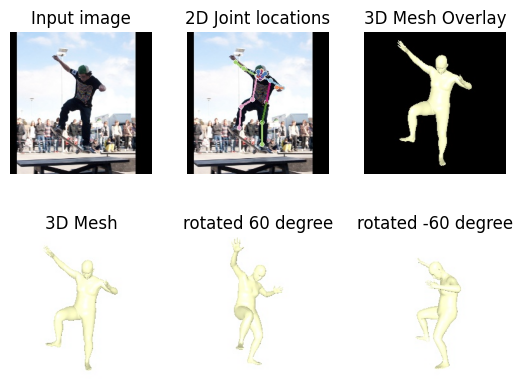

In [ ]:
put_image_on_axis(img, 0, 'Input image')
put_image_on_axis(img_kp2d, 1, '2D Joint locations')
put_image_on_axis(img_overlay, 2, '3D Mesh Overlay')
put_image_on_axis(img_mesh, 3, '3D Mesh')
put_image_on_axis(img_mesh_rot1, 4, 'rotated 60 degree')
put_image_on_axis(img_mesh_rot2, 5, 'rotated -60 degree')

plot.show()